<a href="https://colab.research.google.com/github/lalopezpa/stochastics/blob/main/Tutorial_05.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



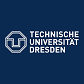

>**Stochastic Modeling and Simulation**

> Winter Semester 2024/25







The following questions are for helping you in understanding the contents of the lecture. Your answers will not be collected or graded but we will discuss the solutions in the class. If you cannot easily answer the questions or have doubts regarding the correctness of your answers, please take a few minutes to review the contents in the book or through the web. Also, please feel free to ask your questions and concerns about the questions in the tutorial classes or in the Forum in the Opal.

In the code cells, please change the ***None*** values between **##start** and **##end** to a desirable code or value. Then, you can run the cell.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
from scipy.integrate import quad
from tqdm import tqdm

# The Law of Large Numbers

We saw two forms of the law of large numbers:

1.   The weak law which state that

 $P(|\dfrac{x_{1}+x_{2}+ ... +x_{n}}{n}-\mu| \ge \epsilon ) \rightarrow 0 $  

 for any $\epsilon \ge 0$ as  $n \rightarrow \infty$
2.   The strong law which state that

 $\dfrac{x_{1}+x_{2}+ ... +x_{n}}{n} \rightarrow \mu $  

 as  $n \rightarrow \infty$


Do you remember the dice experiment in exercise two, in which we wanted to estimate the $Exp(x)$ where $x$ was the sum of ten different dice? What if we get the average of the outcome dices as our RV?

In the code box below, you can simulate this experiment with different dice numbers. The codes are almost the same as exercise 2, with only two differences:


1.
$x = \dfrac{dice_1+dice_2+...+dice_3}{numbers\space of\space dice} $

2. We repeat the experiment for different numbers of dice.


100%|██████████| 100/100 [00:00<00:00, 1684.23it/s]


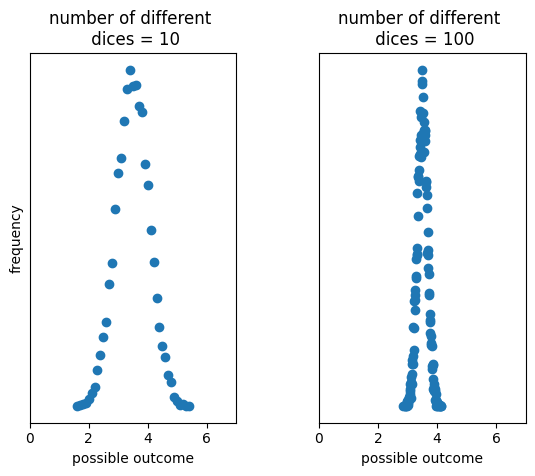

100%|██████████| 10000/10000 [00:06<00:00, 1580.97it/s]


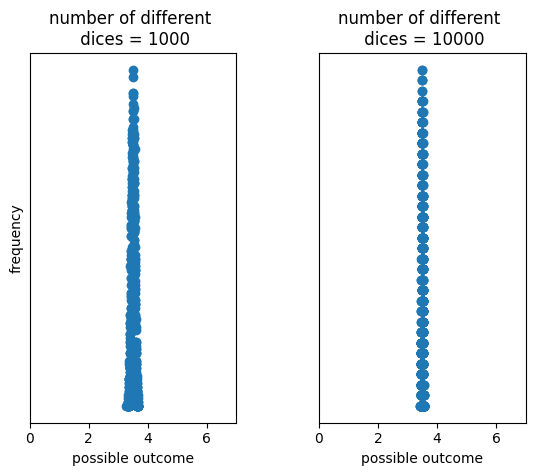

In [2]:
def Experiment(numbers_of_dice, n_trials):
    # Set the number of trials
    N = n_trials

    # Initialize an array to store the sum of dice rolls for each trial
    sum = np.zeros(N)

    # Loop through each dice roll
    for i in tqdm(range(numbers_of_dice)):
        sum += np.random.randint(low=1, high=7, size=N, dtype=int)

    # Compute the average of the dice rolls across all trials
    x = sum / numbers_of_dice

    return x

# Set the number of trials for the experiment
n_trials = 10000

# Define a list of different numbers of dice to experiment with
numbers_list = [10, 100]

# Visualizing the outcomes
fig1, axes = plt.subplots(1, 2)

# Loop through each number of dice
for i, n in enumerate(numbers_list):
    ax = axes[i]
    x = Experiment(n, n_trials)
    unique, counts = np.unique(x, return_counts=True)
    ax.scatter(unique, counts)
    ax.set_xlabel("possible outcome")

    if i == 0:
        ax.set_ylabel("frequency")

    ax.set_title(f"number of different \n dices = {n}")
    plt.subplots_adjust(wspace=0.4)
    ax.set_xlim([0, 7])
    ax.set_yticks([])

plt.show()
plt.close(fig1)

# Repeat the process for a different set of numbers of dice
n_trials = 10000
numbers_list = [1000, 10000]
fig2, axes = plt.subplots(1, 2)

for i, n in enumerate(numbers_list):
    ax = axes[i]
    x = Experiment(n, n_trials)
    unique, counts = np.unique(x, return_counts=True)
    ax.scatter(unique, counts)
    ax.set_xlabel("possible outcome")

    if i == 0:
        ax.set_ylabel("frequency")

    ax.set_title(f"number of different \n dices = {n}")
    plt.subplots_adjust(wspace=0.4)
    ax.set_xlim([0, 7])
    ax.set_yticks([])

plt.show()
plt.close(fig2)


These plots illustrate how the mean converges to $\mu = 3.5$ as the total number of dice increases, showing the law of large numbers in action.

We can also prove this law mathematically in different ways. One way could be using "Chebyshev's inequality".

Chebyshev's inequality states that for every random variable $X$:

$P(|X-E(X)|\ge a) \space \le \space \dfrac{Var(X)}{a^2}$

and $a$ can be **any number more than zero**.

As an exercise, prove the Weak Law of Large Numbers using Chebyshev's inequality.  \\



(**Hint**: Consider your RV as $\space Y =  \dfrac{x_{1}+x_{2}+ ... +x_{n}}{n}$

and show that $\lim_{n \rightarrow \infty} P(| Y - \mu | \geq \varepsilon) = \lim_{N \rightarrow \infty} P(| \overline{X}_N - \mu | \geq \varepsilon) = 0$)

The other way to prove this law is by using the Characteristic function of the random variables. The characteristic function is an alternative way to describe a random variable and is defined as $\varphi _x (t) := \mathbb{E}[e^{itx}]$ for a random variable $X$. In other words, if a random variable admits a probability density function, the characteristic function is the **"Fourier Transform"** of the probability density function. Another exercise in this section is to prove the Weak Law of Large Numbers by demonstrating that the characteristic function of $ \overline{X}_N = \frac{1}{N} \sum_{i=1}^N X_i $ converges to $ e^{it\mu} $ as $ N \to \infty $.


# Monte Carlo Methods for Integration

consider function $H$ as below:



$H_{(x,y)} =
     \begin{cases}
       1 &\quad\text{if} \space \space x^2+y^2 \le 1 \\
       0 &\quad\text{otherwise}
     \end{cases}
$



Can you calculate the integral of this function as follows?

$\int_{- \infty}^{\infty}\int_{- \infty}^{\infty} H_{(x,y)}\;\mathrm{d}x\mathrm{d}y$

Hint: use the shape of the function to calculate the integral

The bellow code can solve this integral using stochastic! This fantastic method, called "Monte Carlo integration", has been introduced in the lecture.

Increase the number of samples in the code from 10 to 1000000 to see how the answer will converge to the analytical solution.

In [4]:
# Define the number of random samples
N_Samples = 1000000

# Set the radius of the circle (which fits inside a square)
radius = 1

# Generate random X and Y coordinates within the square [-1, 1] for both axes
X = np.random.uniform(-radius, radius, N_Samples)
Y = np.random.uniform(-radius, radius, N_Samples)

# Initialize a counter for the number of points that lie inside the circle
inside_circle = 0

# Loop through each sample and check if it lies inside the circle
for i in range(N_Samples):
    if X[i]**2 + Y[i]**2 < radius**2:
        inside_circle += 1

# Estimate the area of the circle
area = (inside_circle / N_Samples) * ((2 * radius) * 2)

# The analytical solution for the area of a circle is pi (π)
analytical_solution = np.pi

# Print the analytical value of pi, the estimated area, and the error between the two
print("Analytical Solution = pi")
print("Estimation = ", area)
print("Error = ", abs(analytical_solution - area))


Analytical Solution = pi
Estimation =  3.141948
Error =  0.00035534641020706914


In the code cell below, we want to calculate the integral $\int_{0}^{1} e^x\;\mathrm{d}x$ using the same method we estimated π in the above code:
- First sample large number of uniform random variable from a Rectangle with $Width = (1 - 0)$ and $Length = (e^1 - 0)$.
- Then see how many of these random numbers are under the curve.
- Finally, we can estimate the area under the curve by this formula:

  $Area\space under\space the\space curve \approx  \dfrac{number\space of\space samples\space under\space the\space curve}{Total\space number\space of\space samples}\cdot Area \space of \space the \space rectangle$




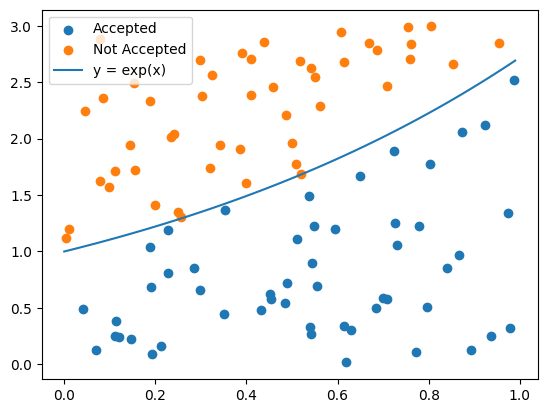

Analytical Solution = 1.718281828459045
Estimation =  1.4135065507987035
Error =  0.3047752776603416


In [15]:
# Set the number of random samples
N_Samples = 100

# Define the bounds for the X and Y coordinates
x_lower_bound = 0  # Lower bound for X (from 0 to 1)
x_upper_bound = 1  # Upper bound for X (1)
y_lower_bound = 0  # Lower bound for Y (0)
##start
y_upper_bound = 3  # Upper bound for Y (?)
##end

# Generate random samples for X and Y using a uniform distribution within the bounds
X = np.random.uniform(x_lower_bound, x_upper_bound, N_Samples)
Y = np.random.uniform(y_lower_bound, y_upper_bound, N_Samples)

# Lists to store points that are below the function (accepted) and above it (not accepted)
x = []  # x-coordinates of accepted points
y = []  # y-coordinates of accepted points
x_e = []  # x-coordinates of not accepted points
y_e = []  # y-coordinates of not accepted points

# Counter for the number of points below the function (y = exp(x))
bellow_function = 0

# Loop through each random sample
for i in range(N_Samples):

    if np.exp(X[i]) > Y[i]:
        bellow_function += 1
        x.append(X[i])  # Store accepted x-coordinate
        y.append(Y[i])  # Store accepted y-coordinate
    else:
        x_e.append(X[i])  # Store not accepted x-coordinate
        y_e.append(Y[i])  # Store not accepted y-coordinate

# Define the range for the x-axis for plotting
x_axis = np.arange(0, 1, 0.01)

# Plot the accepted points (below the function), not accepted points, and the function y = exp(x)
plt.scatter(x, y, label="Accepted")
plt.scatter(x_e, y_e, label="Not Accepted")
plt.plot(x_axis, np.exp(x_axis), label="y = exp(x)")
plt.legend()
plt.show()

# Calculate the area of the rectangle that bounds the region we're sampling from
plane_area = (np.exp(1) - 0) * (1 - 0)

# Analytical solution to the integral of y = exp(x) from 0 to 1
analytical_solution = np.exp(1) - np.exp(0)

# Print the analytical solution (exact value of the integral)
print("Analytical Solution =", analytical_solution)

# Estimate the integral using the proportion of accepted points to total points, multiplied by the area of the rectangle
print("Estimation = ", (bellow_function / N_Samples) * plane_area)

##start
# Calculate the error by comparing the Monte Carlo estimate with the analytical solution
print("Error = ", abs(analytical_solution - ((bellow_function / N_Samples) * plane_area)))
##end


The method used above can be referred to as Monte Carlo Integration with the Hit-or-Miss approach. Let's think about another approach.


- Try evaluating the integral **$\int_{0}^{1} e^x\;\mathrm{d}x$** again using Monte Carlo integration, but this time, rely on a single uniform random variable \( X \sim U(0,1) \). Set the sample size to \( N = 20 \).  

- Notice that, unlike the previous method where two random variables were used for \( x \) and \( y \), we now use only one. This approach is what is typically referred to as **Monte Carlo Integration**. In this method, defining an estimator is essential. What would the Monte Carlo estimator be in this example?

In [19]:
##start
N_Samples = 20
X = np.random.uniform(0, 1, N_Samples)
Exp_Value = np.sum(np.exp(X))/N_Samples
##end
MC_Estimator = (1-0)*Exp_Value
analytical_solution = np.exp(1)-np.exp(0)
print("Analytical Solution =", analytical_solution )
print("Estimation = ", MC_Estimator)
print("Error = ", abs(analytical_solution-(1-0)*Exp_Value))

Analytical Solution = 1.718281828459045
Estimation =  1.6680544515749471
Error =  0.05022737688409795


Let's write a code to use the sampled numbers and estimate the variance of our Monte Carlo Estimator.

In [22]:
##start
Variance = Variance = np.var(np.exp(X)) / N_Samples
##end
print("Estimation of our estimator variance = ", Variance)

Estimation of our estimator variance =  0.008283650045227846


We know that $X$ follows a continuous uniform distribution with the probability density function (PDF):

\begin{equation*}
f_X(x) = \begin{cases}
\frac{1}{b - a} & \text{if } a \le x \le b \\
0 & \text{otherwise}
\end{cases}
\end{equation*}

Additionally, the moment generating function (MGF) for a continuous random variable $X$ is defined as:

\begin{equation*}
M_X(t) = \mathbb{E}(e^{tX}) = \int_{-\infty}^\infty e^{tx} f_X(x) \, dx
\end{equation*}

Now, suppose you have the moment generating function for the uniform distribution and want to use the values of $ M_X(1) $ and $ M_X(2) $ to calculate the variance of the Monte Carlo Estimator used in the previous example, before starting the sampling. Derive the formula for this variance ($Var(\theta_N)$).


Run the code cell bellow to compare the estimated value in the previous code cell with the variance you derived using MGF.

In [ ]:
def mgf_uniform(t, a, b):
    """
    Calculate the Moment Generating Function (MGF) for a Uniform(a, b) distribution.

    Parameters:
    t (float): The value at which to evaluate the MGF.
    a (float): The lower bound of the uniform distribution.
    b (float): The upper bound of the uniform distribution.

    Returns:
    float: The value of the MGF at t.
    """
    if t == 0:
        # Handle t = 0 case to avoid division by zero
        return 1
    else:
        return (np.exp(t * b) - np.exp(t * a)) / (t * (b - a))

a = 0  # Lower bound of uniform distribution
b = 1  # Upper bound of uniform distribution

##start
variance = (mgf_uniform(2, a, b) - mgf_uniform(1, a, b) ** None) / None
##end

print("Variance of Monte Carlo Estimator:", variance)

Let's extend our understanding to double integrals :

- Evaluate the double integral $\int\int_{\Omega} (3y - 2x^2)\mathrm{d} x\mathrm
{d} y \space$ analytically where $-1 \le x \le 2 \space $ and $1 \le y \le 3$.

- Can you define a Monte Carlo estimator for solving this integral?



In the cell below, we want to define a function to get a number as sample size and return 1000 estimated solution for this integral as well as the variance of these estimations.

In [ ]:
def MC_estimator(sample_size):

  # Set the number of samples per trial
  N_Samples = sample_size

  # Set the number of trials for repeated estimations
  n_trials = 1000

  # Initialize an array to store results from each trial
  array = np.zeros((n_trials, N_Samples))

  ##start
  # Define the bounds for the x and y variables (to be set later)
  x_lower_bound = -1
  x_upper_bound = None
  y_lower_bound = None
  y_upper_bound = None
  ##end

  # Calculate the volume of the integration region (area of rectangle)
  volume = (y_upper_bound - y_lower_bound) * (x_upper_bound - x_lower_bound)

  # Loop through each trial to perform Monte Carlo estimation
  for i in range(n_trials):
    # Generate random samples for X and Y within the specified bounds
    X = np.random.uniform(x_lower_bound, x_upper_bound, N_Samples)
    Y = np.random.uniform(y_lower_bound, y_upper_bound, N_Samples)

    # Evaluate the function F = 3Y - 2X^2 at the sampled points
    F = 3 * Y - 2 * (X ** 2)

    # Store the results in the array
    array[i] = F

  ##start
  # Compute the Monte Carlo estimator
  MC_estimator = None * np.mean(array, axis=1)
  ##end

  # Calculate the variance of the Monte Carlo estimator across trials
  variance = np.var(MC_estimator)


  return MC_estimator, variance


In [ ]:
# Define a list of different sample sizes to test
sample_size = [10, 50, 100, 500, 1000]

# Initialize lists to store variance and mean values for each sample size
var = []
mu = []

# Loop over each sample size and compute the Monte Carlo estimator, variance, and mean
for n in sample_size:
  _, variance = MC_estimator(n)
  var.append(variance)

# Plot the variance of the Monte Carlo estimator as a function of sample size
plt.plot(sample_size, var, label="MC_estimator variance")
plt.xlabel("Sample size")
plt.ylabel("Variance")
plt.legend()
plt.show()


# Importance Sampling

Consider the function $f(x)=10e^{-2|x-5|}$ where $x\sim U(0,10)$. Our goal is to compute the expectation of this function using two methods: simple Monte Carlo integration and importance sampling.


-  Part 1: Write the mathematical formulation for the expectation of $f(x)$. Can you detemine the analytical result for this integration?
-  Part 2: Define an estimator for this expectation using simple Monte Carlo integration, with samples drawn from a uniform distribution $U(0,10)$.
-  Part 3: Define another estimator for the expectation using importance sampling, where samples are drawn from a Gaussian distribution $N(5,1)$.
-  Part 4: Which estimator do you expect to have less variance? Why?



> The following code cells will guide you step by step through each part of the problem, providing helpful hints and insights along the way.



In [ ]:
# Part 1: Defining the integral and solving it


# Define the function for which we aim to calculate the integral.
def H(x):
    ##start
    h = np.exp(-2 * np.abs(None))
    ##end
    return h

# Integrate H(x) over the interval [0, 10]
result, error = quad(H, 0, 10)

print(f"Integral result: {result}")
print(f"Estimated error: {error}")


In [ ]:
# Part 2: Using simple Monte Carlo integration, with samples drawn from a uniform distribution  U(0,10) .
# Part 3: Using simple Monte Carlo integration and importance sampling, where samples are drawn from a Gaussian distribution  N(5,1) .


# Define the function for which we aim to calculate the integral.
def H(x):
    return np.exp(-2 * np.abs(x - 5))

# Monte Carlo estimator using uniform sdisr. for sampling
def monte_carlo_uniform(N):
    x_uniform = np.random.uniform(0, 10, N)

    ##start
    estimator = None * np.sum(H(x_uniform)) / N
    ##end

    return estimator


# Monte Carlo with Importance sampling estimator using Gaussian dist. for sampling
def importance_sampling_gaussian(N):
    x_gaussian = np.random.normal(5, 1, N)
    pdf_gaussian = (1 / np.sqrt(2 * np.pi)) * np.exp(-0.5 * (x_gaussian - 5)**2)
    weights = 1 / pdf_gaussian

    ##start
    estimator = np.sum((H(x_gaussian) * weights)) / None
    ##end

    return estimator

# Set sample size
N = 200

# Run estimators
mean_mc= monte_carlo_uniform(N)
mean_is = importance_sampling_gaussian(N)

print(f"Monte Carlo (Uniform) - Estimation: {mean_mc},")
print(f"Importance Sampling (Gaussian) - Estimation: {mean_is}")


In [ ]:
# Part 4: Comparing the varience of the estimators
mc = np.zeros(10)
is_ = np.zeros(10)
for i in range(10):
    mc[i] = monte_carlo_uniform(N)
    is_[i] = importance_sampling_gaussian(N)
print(f"Monte Carlo estimators (Uniform): ", mc )
print(f"Monte Carlo (Uniform) - Variance: {np.var(mc)} \n")
print(f"Importance Sampling estimators (Gaussian): ", is_ )
print(f"Importance Sampling (Gaussian) - Variance: {np.var(is_)}")

In [ ]:
# Part 4: why?

# Generate x values between 0 and 10
x = np.linspace(0, 10, 1000)

# Compute H(x)
H_values = H(x)

# Compute the normal distribution N(5, 1)
normal_values = norm.pdf(x, loc=5, scale=1)

# Plot both functions
plt.figure(figsize=(10, 6))
plt.plot(x, H_values, label=r'$H(x) = 10e^{-2|x-5|}$', color='blue', linewidth=2)
plt.plot(x, normal_values, label=r'$N(5, 1)$', color='red', linestyle='--', linewidth=2)

# Labels and title
plt.title('Plot of $H(x)$ Vs. Normal Distribution $N(5,1)$', fontsize=14)
plt.xlabel('x', fontsize=12)
plt.ylabel('Density / Function Value', fontsize=12)
plt.legend(loc='upper right')
plt.grid(True)
plt.show()